# Multi-class Classification of Fashion Apparels using DNN

### 1. Open fashion_mnist dataset from keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
dataset = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


### 2. Perform basic EDA:

In [3]:
(X_train, y_train), (X_test, y_test) = dataset

In [4]:
print("X_train shape:", X_train.shape, "           y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "            y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)            y_train shape: (60000,)
X_test shape: (10000, 28, 28)             y_test shape: (10000,)


In [5]:
print("X_train size:", X_train.size, "           y_train size:", y_train.size)
print("X_test size:", X_test.size, "          y_test size:", y_test.size)

X_train size: 47040000            y_train size: 60000
X_test size: 7840000           y_test size: 10000


In [6]:
X_train[37]

array([[  0,   0,   1,   1,   0,   1,   0,   0,   0,   0,  34,  95,   0,
          0,   0,   0,  52,  70,   0,   0,   0,   2,   1,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   1,   1,   0,   0,  11,  59, 111, 113, 182, 169,
        226, 255, 188, 175, 162, 105,  85,  31,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   1,   0,   0,  27,  89, 127, 127, 115, 101,  86,  81,
         95,  91,  88,  78,  92, 115, 136, 139, 126,  73,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  49, 117, 113,  95,  94,  97,  98, 102, 101,
         98,  91,  97, 104,  97, 101,  92,  95, 111, 128,  82,   1,   0,
          0,   0],
       [  0,   0,   0,  18, 118, 102,  92,  92,  92,  89,  94,  92,  86,
         85,  88,  94,  92,  92,  95,  99,  95,  98,  89, 126,  24,   0,
          0,   0],
       [  0,   0,   0,  59, 127, 102,  95,  94,  97,  91,  86,  91,  92,
         88,  86,  89,  91,  99, 102, 101,  98,  94,  99, 121,  57,   0,
          0,   0],
       [  

In [7]:
y_train[37]

2

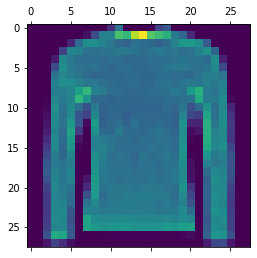

In [8]:
plt.matshow(X_train[37])
plt.show()

### 3. Normalize:

In [9]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[37]

array([0.        , 0.        , 0.00392157, 0.00392157, 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.13333334, 0.37254903, 0.        , 0.        , 0.        ,
       0.        , 0.20392157, 0.27450982, 0.        , 0.        ,
       0.        , 0.00784314, 0.00392157, 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00392157, 0.00392157, 0.        , 0.        ,
       0.04313726, 0.23137255, 0.43529412, 0.44313726, 0.7137255 ,
       0.6627451 , 0.8862745 , 1.        , 0.7372549 , 0.6862745 ,
       0.63529414, 0.4117647 , 0.33333334, 0.12156863, 0.        ,
       0.        , 0.        , 0.00392157, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00392157, 0.        ,
       0.        , 0.10588235, 0.34901962, 0.49803922, 0.49803922,
       0.4509804 , 0.39607844, 0.3372549 , 0.31764707, 0.37254903,
       0.35686275, 0.34509805, 0.30588236, 0.36078432, 0.45098

### 4. Build a simple baseline model:

In [12]:
model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(loss='mean_squared_error', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 27s 13ms/step - loss: 27.6104 - accuracy: 0.0993
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 27.6101 - accuracy: 0.0994
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 27.6101 - accuracy: 0.0993
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 27.6101 - accuracy: 0.1002
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 27.6101 - accuracy: 0.0985
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 27.6101 - accuracy: 0.0975
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 27.6101 - accuracy: 0.1011
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 27.6101 - accuracy: 0.0993
Epoch 9/10
1875/1875 [==============================] - 25s 14ms/step - loss: 27.6101 - accuracy: 0.1033
Epoch 10/10
1875/1875 [==============================] 

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 27.6100 - accuracy: 0.0998


[27.609987258911133, 0.0997999981045723]

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 5. Performance Analysis:

2 layers

In [17]:
model1 = Sequential()
model1.add(Dense(512, input_dim=28*28, activation='relu'))
model1.add(Dense(512, input_dim=28*28, activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(loss='mean_squared_error', metrics=['accuracy'])
model1.fit(X_train,y_train,epochs=10)
model1.evaluate(X_test,y_test)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 27.6102 - accuracy: 0.1020
Epoch 2/10
1875/1875 [==============================] - 37s 19ms/step - loss: 27.6101 - accuracy: 0.1003
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 27.6101 - accuracy: 0.1006
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 27.6101 - accuracy: 0.1002
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 27.6101 - accuracy: 0.1001
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 27.6101 - accuracy: 0.0991
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 27.6101 - accuracy: 0.0984
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 27.6101 - accuracy: 0.0979
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 27.6101 - accuracy: 0.0987
Epoch 10/10
313/313 [==============================] - 

[27.609987258911133, 0.10109999775886536]

3 layers

In [20]:
model4 = Sequential()
model4.add(Dense(512, input_dim=28*28, activation='relu'))
model4.add(Dense(512, input_dim=28*28, activation='relu'))
model4.add(Dense(512, input_dim=28*28, activation='relu'))
model4.add(Dense(10,activation='softmax'))
model4.compile(loss='mean_squared_error', metrics=['accuracy'])
model4.fit(X_train,y_train,epochs=10)
model4.evaluate(X_test,y_test)

Epoch 1/10
1875/1875 [==============================] - 55s 28ms/step - loss: 27.6102 - accuracy: 0.0989
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 27.6101 - accuracy: 0.0983
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 27.6101 - accuracy: 0.0992
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 27.6101 - accuracy: 0.0989
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 27.6101 - accuracy: 0.1008
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 27.6101 - accuracy: 0.1022
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 27.6101 - accuracy: 0.1013
Epoch 8/10
1875/1875 [==============================] - 64s 34ms/step - loss: 27.6101 - accuracy: 0.1001
Epoch 9/10
1875/1875 [==============================] - 60s 32ms/step - loss: 27.6101 - accuracy: 0.0999
Epoch 10/10
313/313 [==============================] - 

[27.609983444213867, 0.10000000149011612]

4 layers

In [22]:
model8 = Sequential()
model8.add(Dense(512, input_dim=28*28, activation='relu'))
model8.add(Dense(512, input_dim=28*28, activation='relu'))
model8.add(Dense(512, input_dim=28*28, activation='relu'))
model8.add(Dense(512, input_dim=28*28, activation='relu'))
model8.add(Dense(10,activation='softmax'))
model8.compile(loss='mean_squared_error', metrics=['accuracy'])
model8.fit(X_train,y_train,epochs=10)
model8.evaluate(X_test,y_test)

Epoch 1/10
1875/1875 [==============================] - 70s 36ms/step - loss: 27.6101 - accuracy: 0.0988
Epoch 2/10
1875/1875 [==============================] - 63s 34ms/step - loss: 27.6101 - accuracy: 0.0990
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 27.6101 - accuracy: 0.1001
Epoch 4/10
1875/1875 [==============================] - 66s 35ms/step - loss: 27.6101 - accuracy: 0.0994
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 27.6101 - accuracy: 0.0989
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 27.6101 - accuracy: 0.1009
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 27.6101 - accuracy: 0.1007
Epoch 8/10
1875/1875 [==============================] - 64s 34ms/step - loss: 27.6101 - accuracy: 0.0996
Epoch 9/10
1875/1875 [==============================] - 63s 33ms/step - loss: 27.6101 - accuracy: 0.0978
Epoch 10/10
313/313 [==============================] - 

[27.609987258911133, 0.10100000351667404]

5 layers

In [23]:
model10 = Sequential()
model10.add(Dense(512, input_dim=28*28, activation='relu'))
model10.add(Dense(512, input_dim=28*28, activation='relu'))
model10.add(Dense(512, input_dim=28*28, activation='relu'))
model10.add(Dense(512, input_dim=28*28, activation='relu'))
model10.add(Dense(512, input_dim=28*28, activation='relu'))
model10.add(Dense(10,activation='softmax'))
model10.compile(loss='mean_squared_error', metrics=['accuracy'])
model10.fit(X_train,y_train,epochs=10)
model10.evaluate(X_test,y_test)

Epoch 1/10
1875/1875 [==============================] - 81s 42ms/step - loss: 27.6101 - accuracy: 0.0978
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 27.6101 - accuracy: 0.0990
Epoch 3/10
1875/1875 [==============================] - 91s 49ms/step - loss: 27.6101 - accuracy: 0.0971
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 27.6101 - accuracy: 0.0998
Epoch 5/10
1875/1875 [==============================] - 80s 43ms/step - loss: 27.6101 - accuracy: 0.0988
Epoch 6/10
1875/1875 [==============================] - 87s 46ms/step - loss: 27.6101 - accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 93s 49ms/step - loss: 27.6102 - accuracy: 0.1007
Epoch 8/10
1875/1875 [==============================] - 92s 49ms/step - loss: 27.6101 - accuracy: 0.0991
Epoch 9/10
1875/1875 [==============================] - 80s 43ms/step - loss: 27.6101 - accuracy: 0.0988
Epoch 10/10
313/313 [==============================] - 

[27.609987258911133, 0.10000000149011612]